In [2]:
import pandas as pd
import numpy as np

In [ ]:
header = ['window_size','time_interval','epochs','latent_dim','score_window','threshold','f1','precision','recall']
df = pd.read_csv('hyperparam_logs/sleep/final_test_distribution.txt', header=None, names=header)
df=df.sort_values(by=['f1'],ascending=False)

In [17]:
#get f1, precision and recall as lists
#get the average and std dev from F1
f1_scores = df['f1'].to_numpy()
precision_scores = df['precision'].to_numpy()
recall_scores = df['recall'].to_numpy()
count = f1_scores.size
index_array = np.arange(1,count+1,dtype=int)

f1_mean = f1_scores.mean()
f1_stddev = np.std(f1_scores)
print(f1_mean)
print(f1_stddev)

#create average F1 line
f1_average = np.full((count,),f1_mean)

#create std-dev range
one_std_up_total_f1 = np.full((count,),f1_mean+f1_stddev)
one_std_down_f1 = np.full((count,),f1_mean-f1_stddev)

0.708
0.09184770002564027


In [19]:
#packages for plotting the charts
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

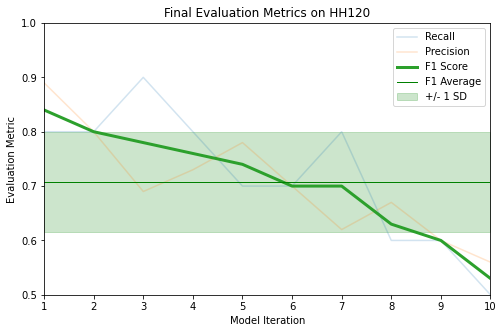

In [22]:
#plot the chart

#plot the recall and precision
plt.plot(index_array,recall_scores,label="Recall",alpha=0.2)
plt.plot(index_array,precision_scores,label="Precision",alpha=0.2)

#plot the f1 per day
plt.plot(index_array,f1_scores,label="F1 Score",linewidth=3)
plt.plot(index_array,f1_average,label="F1 Average",c="g",linewidth=1)

plt.fill_between(index_array,one_std_down_f1,one_std_up_total_f1,color='green',alpha=0.2)

#output of hyperparameter tuning scores
plt.title('Final Evaluation Metrics on HH120')
plt.xlabel('Model Iteration')
plt.ylabel('Evaluation Metric')

# where some data has already been plotted to ax
handles, labels = plt.gca().get_legend_handles_labels()
patch = mpatches.Patch(color='green', alpha=0.2, label='+/- 1 SD')
handles.append(patch)
plt.legend(handles=handles, loc="upper right")

#axis ranges
plt.ylim([0.5, 1])
plt.xlim([1, count])

#set fig size
fig = plt.gcf()
fig.set_size_inches(8, 5)
plt.savefig(f'report_outputs/final_distribution.jpg',dpi=200)
plt.show()

